# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
units = "metric"

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

583

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build query URL
query_url = url + "appid=" + weather_api_key + "&q="


In [7]:
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=15cb2043ba0bca628bcbf44aa8cd6e24&q=


In [18]:
# set up lists to hold reponse info
lat = []
lng = []
temp = []
new_cities = []
humidity = []
max_temp = []
cloudiness = []
wind_speed = []
country = []
date = []


# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city + '&units=imperial')
        # print(city)
        # print(response.content)
        response_json = response.json()
        lat.append(response_json['coord']['lat'])
        lng.append(response_json['coord']['lon'])
        temp.append(response_json['main']['temp_max'])
        humidity.append(response_json['main']['humidity'])
        wind_speed.append(response_json['wind']['speed'])
        cloudiness.append(response_json['clouds']['all'])
        country.append(response_json['sys']['country'])
        date.append(response_json['dt'])
        new_cities.append(city)
    except:
        pass

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
weather_dict = {
    "City": new_cities,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
}

#change to F and MPH
weather_data = pd.DataFrame(weather_dict)
weather_data['City'] = weather_data['City'].str.title()
weather_data['Max Temp'] = weather_data['Max Temp']
weather_data.to_csv('weather_data.csv')
weather_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Butaritari,3.0707,172.7902,81.79,77,17,15.19,KI,1643946461
1,Tuktoyaktuk,69.4541,-133.0374,-23.80,76,75,8.05,CA,1643946549
2,Jumla,29.2747,82.1838,35.69,91,100,6.89,NP,1643946750
3,Eyl,7.9803,49.8164,70.14,69,1,11.12,SO,1643946620
4,Busselton,-33.6500,115.3333,100.04,33,49,14.79,AU,1643946751
...,...,...,...,...,...,...,...,...,...
530,Acari,-15.4311,-74.6158,72.99,75,29,3.89,PE,1643946927
531,Pangnirtung,66.1451,-65.7125,-14.55,99,100,2.95,CA,1643946928
532,Cockburn Town,21.4612,-71.1419,75.83,71,1,19.48,TC,1643946928
533,Swift Current,50.2834,-107.8014,-12.19,77,0,14.97,CA,1643946928


In [20]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,535.000000,535.000000,535.000000,535.000000,535.00000,535.00000,5.350000e+02
mean,21.073048,17.666763,49.180579,74.824299,61.97757,8.60615,1.643947e+09
std,33.322560,88.310380,31.055733,20.742739,40.64664,7.00740,1.075034e+02
min,-54.800000,-175.200000,-43.560000,10.000000,0.00000,0.00000,1.643946e+09
25%,-5.511800,-55.103200,26.950000,66.000000,19.50000,3.25500,1.643947e+09
50%,25.383300,20.883300,58.300000,78.000000,79.00000,6.93000,1.643947e+09
75%,50.656800,91.733350,75.175000,92.000000,100.00000,11.81500,1.643947e+09
max,78.218600,179.316700,106.210000,100.000000,100.00000,50.06000,1.643947e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#I skipped this step because there are no cities with humity over 100%.

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [29]:
#this is setting up the variables for the visualizations
latitude = weather_data["Lat"]
humidity = weather_data['Humidity']
maxtemp = weather_data['Max Temp']
clouds = weather_data['Cloudiness']
windspeed = weather_data['Wind Speed']

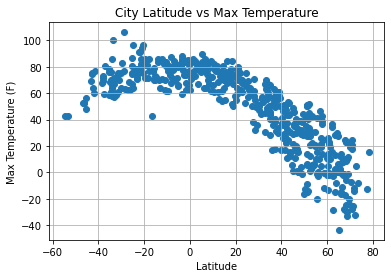

In [30]:
plt.scatter(latitude, maxtemp)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs Max Temperature')
plt.grid()
plt.show()

In [31]:
#add a sentence or two explaining what the code is analyzing.

## Latitude vs. Humidity Plot

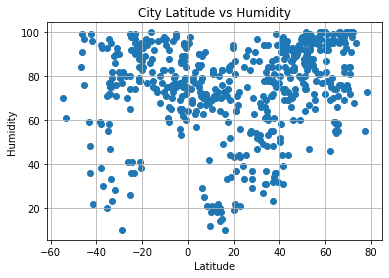

In [32]:
plt.scatter(latitude, humi)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs Humidity')
plt.grid()
plt.show()

In [ ]:
#add a sentence or two explaining what the code is analyzing.

## Latitude vs. Cloudiness Plot

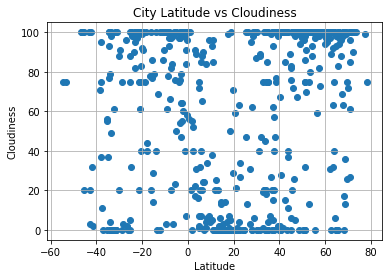

In [34]:
plt.scatter(latitude, clouds)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs Cloudiness')
plt.grid()
plt.show()

In [35]:
#add a sentence or two explaining what the code is analyzing.

## Latitude vs. Wind Speed Plot

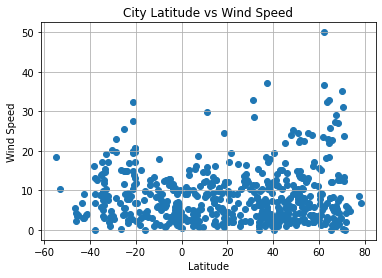

In [36]:

plt.scatter(latitude, windspeed)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('City Latitude vs Wind Speed')
plt.grid()
plt.show()

In [37]:
#add a sentence or two explaining what the code is analyzing.

## Linear Regression

In [51]:
northern = weather_data.loc[weather_data['Lat'] > 0]
southern = weather_data.loc[weather_data['Lng'] <= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

TypeError: unhashable type: 'numpy.ndarray'

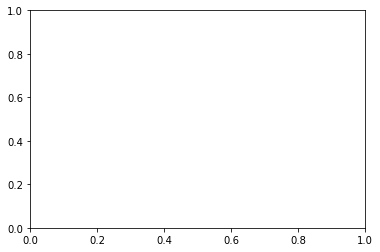

In [52]:
# (slope, intercept, rvalue, pvalue, stderr) = linregress(northern, windspeed)
# regress_values = northern * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northern, windspeed)
#plt.plot(northern, regress_values,"r-")
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs Max Temperature')
plt.grid()
# print(f"The r-value is: {rvalue**2}")
plt.show()

The r-value is: 0.46937863826630627


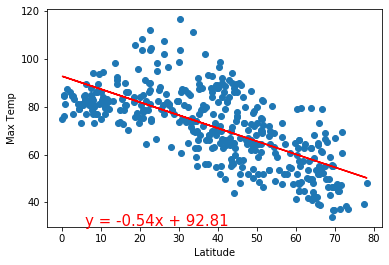

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6082708688906918


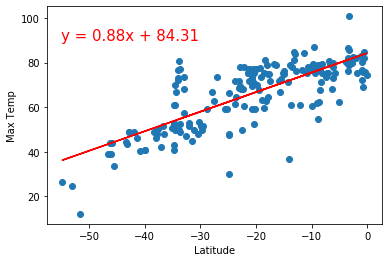

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000543987878808455


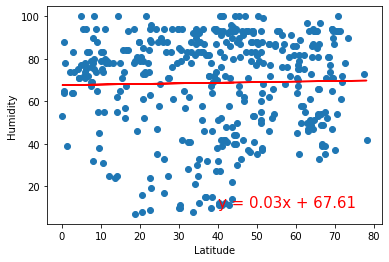

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.014985174297345524


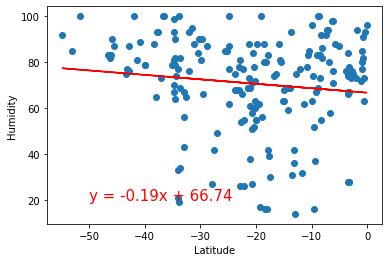

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0020898727664228514


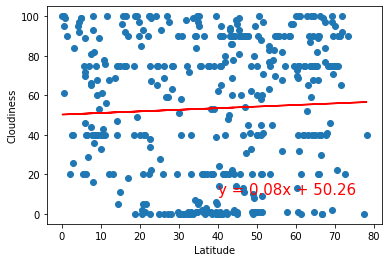

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0035263772085582894


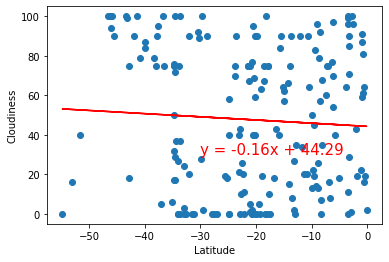

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04019723576144484


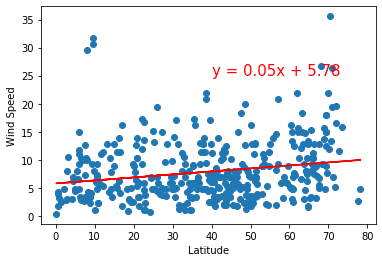

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.017128274759839232


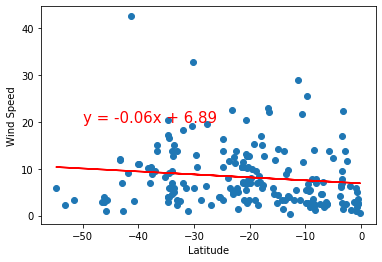